In [2]:
#Mounting the drive to link with the data
import os
from google.colab import drive
drive.mount('/content/gdrive')
print(os.listdir("/content/gdrive/My Drive/Thesis Earthquake Data/"))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
['EarthquakeDataR.csv', 'output.html', 'EarthquakeDataImp.csv', 'EarthquakeDataTime.csv', 'earthquake.csv', 'EarthquakeDataArima.csv', 'data.csv']


In [0]:
#Importing the necessary libraries
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Importing the pre-processed data to save time with pandas.
EarthquakeDataImp = pd.read_csv('/content/gdrive/My Drive/Thesis Earthquake Data/EarthquakeDataImp.csv')

In [0]:
#Removing the columns showing high correlation after Boruta by creating correlation matrix.
EarthquakeDataImp = EarthquakeDataImp.drop(['Unnamed: 0','EQID','T0.035S','Mo (dyne.cm)','Fault Rupture Width (km)','Dip (deg)','Depth to Top Of Fault Rupture Model'],axis=1)
EarthquakeDataImp

,Earthquake Magnitude,Strike (deg),Rake Angle (deg),Mechanism Based on Rake Angle,P-plunge (deg),P-trend (deg),T-plunge (deg),T-trend (deg),Fault Rupture Length for Calculation of Ry (km),Fault Rupture Area (km^2),T0.036S,CRjb.4,CRjb.5,Hypocenter_Depth_(KM)
0,6.0,268.0,160.0,0.0,2.9,316.30,24.60,225.00,16.2,68.1,0.211880,0.00,0.00,6.00
1,6.0,268.0,160.0,0.0,2.9,316.29,24.62,224.96,15.3,120.0,0.063570,1.14,1.14,6.00
2,5.8,196.2,0.0,0.0,0.0,151.20,0.00,61.20,8.9,74.3,0.041890,0.00,0.00,10.00
3,5.0,205.5,0.0,0.0,0.0,160.50,0.00,70.50,2.2,8.4,0.019835,0.00,23.58,16.00
4,5.5,35.0,0.0,0.0,0.0,350.00,0.00,260.00,4.4,25.0,0.126340,0.00,0.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000358,4.58,4.58,7.59
21524,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000544,4.58,4.58,7.59
21525,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000349,4.58,4.58,7.59
21526,3.8,134.0,-178.0,0.0,11.3,357.90,8.50,89.60,1.1,1.0,0.000270,4.58,4.58,7.59


In [0]:
#Scaling the features with min max to make all the features in similar numbers for fast execution of algorithm
scaler = preprocessing.MinMaxScaler()
EarthquakeDataImpscaled = scaler.fit_transform(EarthquakeDataImp)


In [0]:
#Creating a data frame.
EarthquakeDataImpscaled= pd.DataFrame(EarthquakeDataImpscaled)
EarthquakeDataImpscaled
#type(EarthquakeDataImpscaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.613035,0.744444,0.635514,0.0,0.032475,0.878855,0.282434,0.627503,0.051871,0.005333,0.058828,0.000000,0.000000,0.073845
1,0.613035,0.744444,0.635514,0.0,0.032475,0.878827,0.282664,0.627391,0.048917,0.009404,0.017650,0.057986,0.028529,0.073845
2,0.572301,0.545000,0.336449,0.0,0.000000,0.420117,0.000000,0.168846,0.027905,0.005820,0.011631,0.000000,0.000000,0.123240
3,0.409369,0.570833,0.336449,0.0,0.000000,0.445957,0.000000,0.194887,0.005909,0.000651,0.005507,0.000000,0.590090,0.197333
4,0.511202,0.097222,0.336449,0.0,0.000000,0.972492,0.000000,0.725506,0.013132,0.001953,0.035078,0.000000,0.000000,0.123240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000099,0.232960,0.114615,0.093480
21524,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000151,0.232960,0.114615,0.093480
21525,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000097,0.232960,0.114615,0.093480
21526,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000075,0.232960,0.114615,0.093480


In [0]:
#Mapping the Columns
EarthquakeDataImpscaled = EarthquakeDataImpscaled.rename(columns={ 0: 'Earthquake Magnitude', 1: 'Strike (deg)', 2: 'Rake Angle (deg)', 3: 'Mechanism Based on Rake Angle', 4: 'P-plunge (deg)', 5: 'P-trend (deg)', 6: ' P-plunge (deg)', 7: 'T-trend (deg)	'
                                                                  , 8: 'Fault Rupture Length for Calculation of Ry (km)', 9: 'Fault Rupture Area (km^2)', 10: 'T0.036S'
                                                                  , 11: 'CRjb.4', 12: 'CRjb.5', 13: 'Hypocenter_Depth_(KM)'})
EarthquakeDataImpscaled

,Earthquake Magnitude,Strike (deg),Rake Angle (deg),Mechanism Based on Rake Angle,P-plunge (deg),P-trend (deg),P-plunge (deg),T-trend (deg)\t,Fault Rupture Length for Calculation of Ry (km),Fault Rupture Area (km^2),T0.036S,CRjb.4,CRjb.5,Hypocenter_Depth_(KM)
0,0.613035,0.744444,0.635514,0.0,0.032475,0.878855,0.282434,0.627503,0.051871,0.005333,0.058828,0.000000,0.000000,0.073845
1,0.613035,0.744444,0.635514,0.0,0.032475,0.878827,0.282664,0.627391,0.048917,0.009404,0.017650,0.057986,0.028529,0.073845
2,0.572301,0.545000,0.336449,0.0,0.000000,0.420117,0.000000,0.168846,0.027905,0.005820,0.011631,0.000000,0.000000,0.123240
3,0.409369,0.570833,0.336449,0.0,0.000000,0.445957,0.000000,0.194887,0.005909,0.000651,0.005507,0.000000,0.590090,0.197333
4,0.511202,0.097222,0.336449,0.0,0.000000,0.972492,0.000000,0.725506,0.013132,0.001953,0.035078,0.000000,0.000000,0.123240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21523,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000099,0.232960,0.114615,0.093480
21524,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000151,0.232960,0.114615,0.093480
21525,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000097,0.232960,0.114615,0.093480
21526,0.164969,0.372222,0.003738,0.0,0.126540,0.994443,0.097589,0.248369,0.002298,0.000071,0.000075,0.232960,0.114615,0.093480


In [0]:
#transforming the data with square root as positive skewness exists.
EarthquakeDataImpscaledsqrt = np.sqrt(EarthquakeDataImpscaled)

In [0]:
#Splitting the data into train and test split.
X = EarthquakeDataImpscaledsqrt.iloc[:, 0:13]
y = EarthquakeDataImpscaledsqrt.iloc[:, 13]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [0]:
#Implementing Ridge regression
rr = Ridge(alpha=10)
rr.fit(X_train, y_train) 
x_pred= rr.predict(X_train)
y_pred= rr.predict(X_test)

In [0]:
#unscaling the data using inverse transform
scale=preprocessing.MinMaxScaler()
scale.min_,scale.scale_=scaler.min_[13], scaler.scale_[13]
y_pred_unscaled = scale.inverse_transform(y_pred.reshape(-1,1))
y_test_unscaled = scale.inverse_transform(y_test.values.reshape(-1,1))

In [0]:
#R squared value for ridge regression
#train_score = r2_score(X_train,y_pred)
test_score = r2_score(y_test_unscaled, y_pred_unscaled)
#train_score
test_score

0.1423929423299295

In [0]:
#MAPE
a = (max(y_pred_unscaled)) - (min(y_pred_unscaled))
a

array([10.53281252])

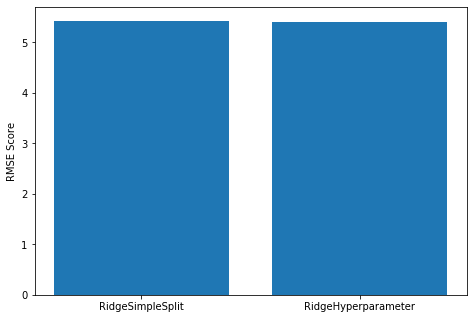

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ['RidgeSimpleSplit', 'RidgeHyperparameter']
RMSE = [5.43,5.40]
ax.bar(Models,RMSE)
ax.set_ylabel('RMSE Score')
plt.show()

In [0]:
##For Ridge regression#
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_unscaled, y_pred_unscaled))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_unscaled, y_pred_unscaled)))

Mean Absolute Error: 4.242126292976348
Mean Squared Error: 29.49841146444033
Root Mean Squared Error: 5.431244007079808


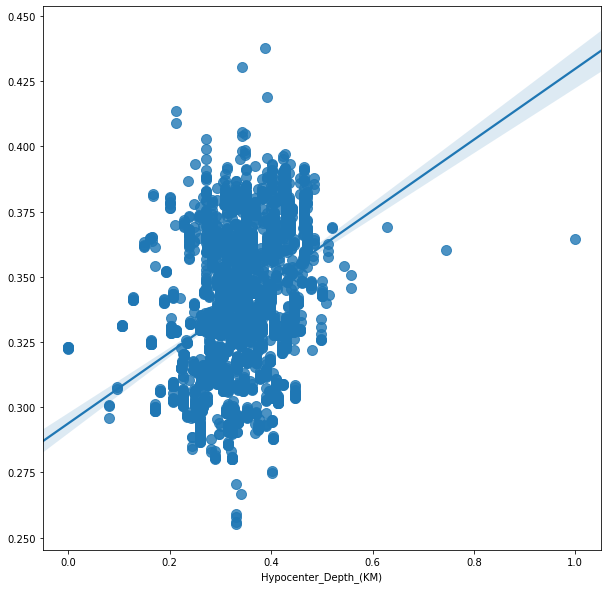

In [0]:
#plotting the best fit line
plt.figure(figsize=(10,10))         
sns.regplot(y_test, y_pred, fit_reg=True, scatter_kws={"s": 100})

In [0]:
#Hyperparameter Tuning by RandomizedSearchCV
import numpy as np
from scipy.stats import uniform as sp_rand
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#passing the values for alpha parameter
alpha=[100, 550, 600, 620, 650]

grid_param = { 
    
    'alpha': sp_rand()
}
#splitting the data into training and testing.
X_train, X_test, y_train, y_test=train_test_split(EarthquakeDataImpscaledsqrt.iloc[:,0:13], EarthquakeDataImpscaledsqrt['Hypocenter_Depth_(KM)'],test_size=0.2,random_state=123)
#Implementing Random Search
from sklearn.model_selection import RandomizedSearchCV
RR = Ridge(random_state=123)
RR_random = RandomizedSearchCV(estimator=RR,param_distributions=grid_param,n_iter=500,n_jobs=-1,cv=5)
RR_random.fit(X_train,y_train)
print(RR_random.best_params_)
expected_y  = y_test
y_pred = RR_random.predict(X_test)
#Printing the metrics
print("The best parameters are :")
print(RR_random.best_params_)
scale.min_,scale.scale_=scaler.min_[13], scaler.scale_[13]
y_pred_unscaled = scale.inverse_transform(y_pred.reshape(-1,1))
y_test_unscaled = scale.inverse_transform(y_test.values.reshape(-1,1))
print("The RMSE is :")
print(np.sqrt(mean_squared_error(y_test_unscaled,y_pred_unscaled)))
print("The R2 is :") 
print(r2_score(y_test_unscaled, y_pred_unscaled))
print("The MAE is :")
print(mean_absolute_error(y_test_unscaled, y_pred_unscaled))

{'alpha': 0.009338043767782245}
The best parameters are :
{'alpha': 0.009338043767782245}
The RMSE is :
5.407887078272861
The R2 is :
0.14975331701144268
The MAE is :
4.207568836586721


In [0]:
#Colab Model
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz


In [0]:
#For CPU
!lscpu |grep 'MHz'

CPU MHz:             2200.000


In [0]:
#Usable memory
!cat /proc/meminfo | grep 'MemAvailable'

MemAvailable:   12518308 kB


In [0]:
#storage space
!df -h / awk '{print $4}'

df: awk: No such file or directory
df: '{print $4}': No such file or directory
Filesystem      Size  Used Avail Use% Mounted on
overlay          49G   28G   19G  60% /


In [0]:
#VERSIONS OF PYTHON LIBRARIES USED 
import sklearn
print(sklearn.__version__)

0.21.3


In [0]:
import pandas
print(pandas.__version__)

0.25.3


In [0]:
import numpy
print(numpy.__version__)

1.17.4


In [0]:
import matplotlib
print(matplotlib.__version__)

3.1.2


In [0]:
import missingno
print(missingno.__version__)

0.4.2


In [0]:
import scipy.stats
print(scipy.__version__)

1.3.3
